In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

In [66]:
input, target = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# Розбиваємо дані на тренування та тестування
X_train, X_test, y_train, y_test = train_test_split(input, target)

Цікаво вивести усі фічі(розмітки) датасету

In [76]:
X_test.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Визначимо за допомогою простої та складної моделі точність передбачень
Проста модель учиться лише на mean radius(середньому радіусі)

In [67]:
model_simple = LogisticRegression(random_state=0, max_iter=10000)
model_simple.fit(X_train[X_train.columns[:1]], y_train)
model_simple.score(X_test[X_test.columns[:1]], y_test)

0.8671328671328671

Складна учиться на усіх вхідних даних
Точність у складної моделі вище. Вона складає більше 95%.
Тобто маючи дані відповідні дані, можна спрогнозувати з певною ймовірністю чи пухлина є злоякісною чи доброякісною.

In [68]:
model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.958041958041958

Виведемо декілька графіків для наглядності залежності.
Злоякісне утворення = 0
Доброякісне утворення = 1
Помітна явна лінійна залежність навіть лише за площею пухлини

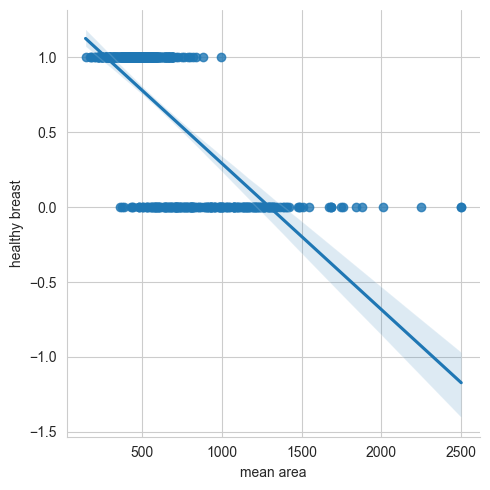

In [69]:
data = input.__copy__()
data['healthy breast'] = target
sns.lmplot(data, x=data.columns[3], y=data.columns[-1]);

Виведемо граф відносно mean radius(середнього радіуса пухлини) та якості пухлини, де
Злоякісне утворення = 0
Доброякісне утворення = 1
Чітко видно різницю між пухлинами через їх середній радіус.
Можна стверджувати:
"Якщо середній радіус пухлини менший 13 мм, то пухлина звеликою ймовірністю доброякісна"
"Якщо середній радіус пухлини менший 10 мм, то пухлина доброякісна"

<AxesSubplot: xlabel='healthy breast', ylabel='mean radius'>

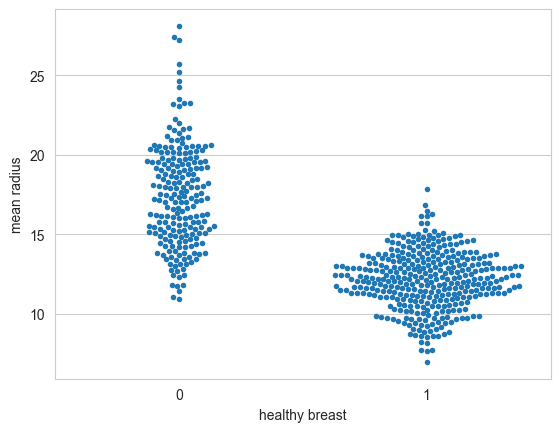

In [70]:
sns.swarmplot(data, x=data.columns[-1], y=data.columns[0], size=4)

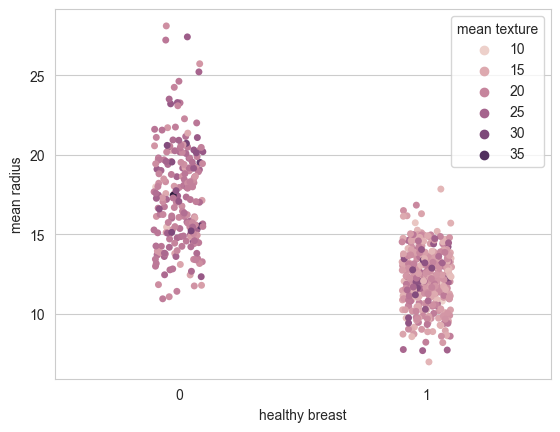

In [71]:
sns.stripplot(data, x=data.columns[-1], y=data.columns[0], hue=data.columns[1]);

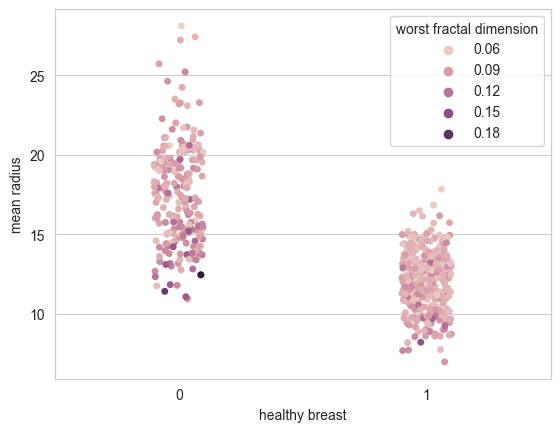

In [72]:
sns.stripplot(data, x=data.columns[-1], y=data.columns[0], hue=data.columns[-2]);

Візуалізація роботи моделі. Малює його спроможність прогнозувати.
З графіка видно, що модель близько в два рази гірше передбачує наявність доброякісних пухлин.

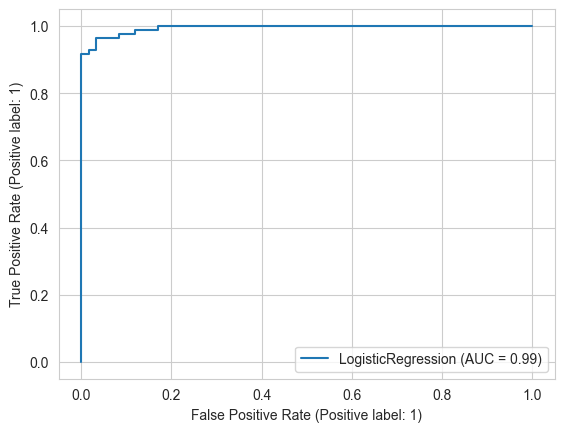

In [73]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

Графік якості передачування простої моделі займає меншу площу(AUC).
Крім того, він просто передбачує доброякісні пухлини ніж злоякісні.
Це не дивно, бо з графіку In 70 чітко видно різницю між пухлинами через їх середній радіус

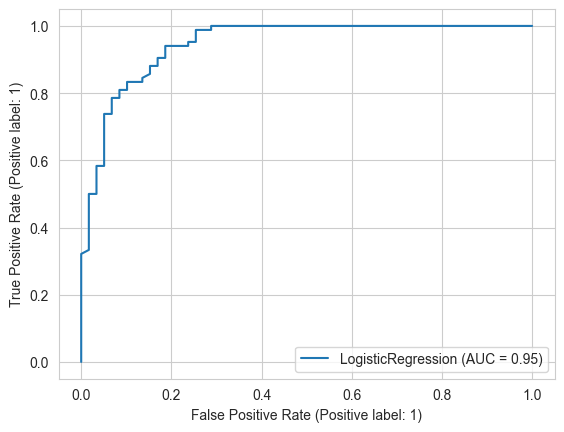

In [75]:
RocCurveDisplay.from_estimator(model_simple, X_test[X_test.columns[:1]], y_test)